In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("Set1", n_colors=8, desat=.55)

In [2]:
qwe_data = pd.read_excel("QWE Inc._Data.xlsx")
print(qwe_data.info())
qwe_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
cust_id                 6347 non-null int64
cust_age                6347 non-null int64
churn                   6347 non-null int64
chiscore_nov            6347 non-null int64
chiscore_nov_dec        6347 non-null int64
suppcase_nov            6347 non-null int64
suppcase_nov_dec        6347 non-null int64
avgspriority_nov        6347 non-null float64
avgspriority_nov_dec    6347 non-null float64
logins_nov_dec          6347 non-null int64
blogs_nov_dec           6347 non-null int64
views_nov_dec           6347 non-null int64
days_nov_dec            6347 non-null int64
dtypes: float64(2), int64(11)
memory usage: 644.7 KB
None


,cust_id,cust_age,churn,chiscore_nov,chiscore_nov_dec,suppcase_nov,suppcase_nov_dec,avgspriority_nov,avgspriority_nov_dec,logins_nov_dec,blogs_nov_dec,views_nov_dec,days_nov_dec
0,1,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,2,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,3,55,0,0,0,0,0,0.0,0.0,0,0,0,31
3,4,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,5,57,0,43,-1,0,0,0.0,0.0,0,0,9,31


# Q1

/Users/apple/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


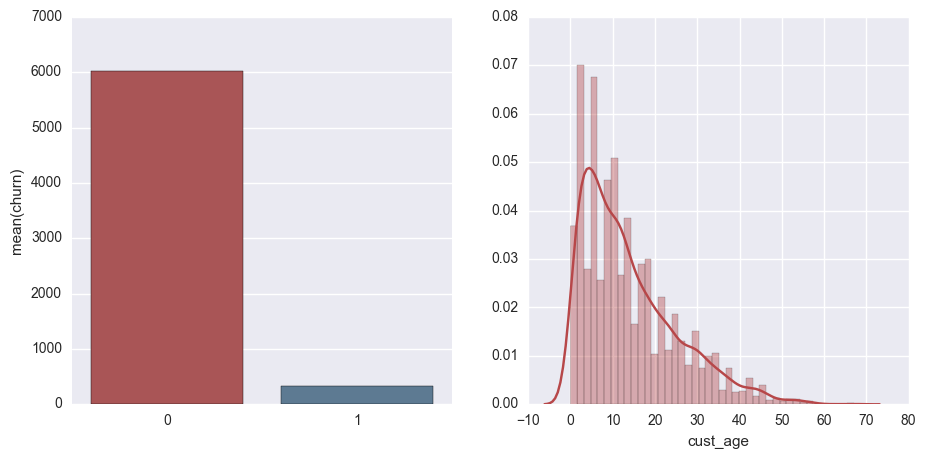

In [3]:
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(10.8, 5)
sns.barplot(x=qwe_data["churn"].value_counts().index, y=qwe_data["churn"].value_counts(), ax=ax[0])
sns.distplot(qwe_data["cust_age"], ax=ax[1])

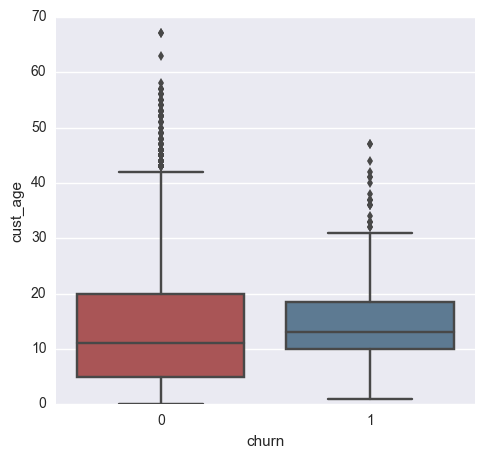

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(5.4, 5)
sns.boxplot(x="churn", y="cust_age", data=qwe_data)

# Q2

In [5]:
import statsmodels.api as sm
qwe_train_y_stats = qwe_data["churn"]
qwe_train_x_stats = qwe_data.drop(["cust_id", "churn"], axis=1)
qwe_train_x_stats["intercept"] = 1
logit = sm.Logit(qwe_train_y_stats, qwe_train_x_stats)
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.192243
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.044     
Dependent Variable:   churn             AIC:               2464.3318 
Date:                 2017-02-25 23:40  BIC:               2545.4006 
No. Observations:     6347              Log-Likelihood:    -1220.2   
Df Model:             11                LL-Null:           -1276.6   
Df Residuals:         6335              LLR p-value:       5.0768e-19
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
cust_age              0.0127   0.0054   2.3659 0.0180  0.0022  0.0232
chiscore_nov         -0.0047   0.0012  -3.8076 0.0001 -0.0071 -0.0023
chiscore_nov_dec     -0.0103   0.0025  -4.1526 0.0000 -0.0151 -0.0054
suppcase_nov         -0.1524   0.1049  -1.4523 0.1464 -0.3580  0.0533
suppcase_nov_dec      0.1703   0.0905   1.8814 0.0599 -0.0071  0.3476
avgspriority_nov      0.0159   0.1022   0.1559 0.8761 -0.1843  0.2162
avgspriority_nov_dec -0.0519   0.0785  -0.6615 0.5083 -0.2058  0.1020
logins_nov_dec        0.0003   0.0021   0.1383 0.8900 -0.0038  0.0044
blogs_nov_dec         0.0003   0.0196   0.0148 0.9882 -0.0381  0.0387
views_nov_dec        -0.0001   0.0000  -2.6966 0.0070 -0.0002 -0.0000
days_nov_dec          0.0172   0.0043   4.0203 0.0001  0.0088  0.0256
intercept            -2.7627   0.1069 -25.8412 0.0000 -2.9722 -2.5531
=====================================================================

"""

In [6]:
selected_stats = pd.DataFrame([qwe_data.loc[671], qwe_data.loc[353], qwe_data.loc[5202]])
selected_stats.set_index("cust_id", inplace=True)
selected_stats["churn_prob"] = result.predict(qwe_train_x_stats.loc[selected_stats.index-1])
selected_stats[["churn", "churn_prob"]]

,churn,churn_prob
cust_id,,
672.0,0.0,0.038105
354.0,0.0,0.047798
5203.0,0.0,0.042739


# Q3

In [7]:
qwe_data.loc[qwe_data["cust_age"] <= 6, "age_group"] = "0 - 6"
qwe_data.loc[(qwe_data["cust_age"] >= 7) & (qwe_data["cust_age"] <= 13), "age_group"] = "7 - 13"
qwe_data.loc[qwe_data["cust_age"] >= 14, "age_group"] = "14 +"
qwe_data["age_group"].value_counts()

14 +      2600
0 - 6     2051
7 - 13    1696
Name: age_group, dtype: int64

In [8]:
col_to_delete = ["cust_id", "churn", "age_group"]
qwe_train_stats_x_0_6 = qwe_data[qwe_data["age_group"] == "0 - 6"].drop(col_to_delete, axis=1)
qwe_train_stats_x_7_13 = qwe_data[qwe_data["age_group"] == "7 - 13"].drop(col_to_delete, axis=1)
qwe_train_stats_x_14_plus = qwe_data[qwe_data["age_group"] == "14 +"].drop(col_to_delete, axis=1)
qwe_train_stats_y_0_6 = qwe_data.loc[qwe_data["age_group"] == "0 - 6", "churn"]
qwe_train_stats_y_7_13 = qwe_data.loc[qwe_data["age_group"] == "7 - 13", "churn"]
qwe_train_stats_y_14_plus = qwe_data.loc[qwe_data["age_group"] == "14 +", "churn"]

In [9]:
qwe_train_stats_x_0_6["intercept"] = 1
qwe_train_stats_x_7_13["intercept"] = 1
qwe_train_stats_x_14_plus["intercept"] = 1

In [10]:
logit_0_6 = sm.Logit(qwe_train_stats_y_0_6, qwe_train_stats_x_0_6)
logit_7_13 = sm.Logit(qwe_train_stats_y_7_13, qwe_train_stats_x_7_13)
logit_14 = sm.Logit(qwe_train_stats_y_14_plus, qwe_train_stats_x_14_plus)
result_0_6 = logit_0_6.fit()
print(result_0_6.summary2())
result_7_13 = logit_7_13.fit()
print(result_7_13.summary2())
result_14 = logit_14.fit()
print(result_14.summary2())

Optimization terminated successfully.
         Current function value: 0.092806
         Iterations 9
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.105     
Dependent Variable:   churn             AIC:               404.6896  
Date:                 2017-02-25 23:41  BIC:               472.2026  
No. Observations:     2051              Log-Likelihood:    -190.34   
Df Model:             11                LL-Null:           -212.57   
Df Residuals:         2039              LLR p-value:       6.0699e-06
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       9.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
cust_age              0.3883   0.1330   2.9192 0.0035  0.1276  0.6490
chiscore_nov    

In [11]:
selected_stats.loc[672, "churn_new_prob"] = result_14.predict(qwe_train_stats_x_14_plus.loc[671])
selected_stats.loc[354, "churn_new_prob"] = result_7_13.predict(qwe_train_stats_x_7_13.loc[353])
selected_stats.loc[5203, "churn_new_prob"] = result_0_6.predict(qwe_train_stats_x_0_6.loc[5202])

In [12]:
selected_stats[["churn", "churn_prob", "churn_new_prob"]]

,churn,churn_prob,churn_new_prob
cust_id,,,
672.0,0.0,0.038105,0.038145
354.0,0.0,0.047798,0.098337
5203.0,0.0,0.042739,0.012096


# Q4

In [13]:
dummies = pd.get_dummies(qwe_data["age_group"])
qwe_data_stats_new = pd.merge(qwe_data, dummies, left_index=True, right_index=True)
qwe_data_stats_new.drop("age_group", axis=1, inplace=True)
qwe_data_stats_new.head(5)

,cust_id,cust_age,churn,chiscore_nov,chiscore_nov_dec,suppcase_nov,suppcase_nov_dec,avgspriority_nov,avgspriority_nov_dec,logins_nov_dec,blogs_nov_dec,views_nov_dec,days_nov_dec,0 - 6,14 +,7 - 13
0,1,67,0,0,0,0,0,0.0,0.0,0,0,0,31,0.0,1.0,0.0
1,2,67,0,62,4,0,0,0.0,0.0,0,0,-16,31,0.0,1.0,0.0
2,3,55,0,0,0,0,0,0.0,0.0,0,0,0,31,0.0,1.0,0.0
3,4,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0,0.0,1.0,0.0
4,5,57,0,43,-1,0,0,0.0,0.0,0,0,9,31,0.0,1.0,0.0


In [14]:
qwe_stats_final_x = qwe_data_stats_new.drop(["cust_id", "churn", "14 +"], axis=1)
qwe_stats_final_y = qwe_data_stats_new["churn"]
qwe_stats_final_x["intercept"] = 1
qwe_stats_final_x.head(5)

,cust_age,chiscore_nov,chiscore_nov_dec,suppcase_nov,suppcase_nov_dec,avgspriority_nov,avgspriority_nov_dec,logins_nov_dec,blogs_nov_dec,views_nov_dec,days_nov_dec,0 - 6,7 - 13,intercept
0,67,0,0,0,0,0.0,0.0,0,0,0,31,0.0,0.0,1
1,67,62,4,0,0,0.0,0.0,0,0,-16,31,0.0,0.0,1
2,55,0,0,0,0,0.0,0.0,0,0,0,31,0.0,0.0,1
3,63,231,1,1,-1,3.0,0.0,167,-8,21996,0,0.0,0.0,1
4,57,43,-1,0,0,0.0,0.0,0,0,9,31,0.0,0.0,1


In [15]:
logit_final = sm.Logit(qwe_stats_final_y, qwe_stats_final_x)
result_final = logit_final.fit()
result_final.summary2()

Optimization terminated successfully.
         Current function value: 0.185039
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.080     
Dependent Variable:  churn             AIC:               2376.8820 
Date:                2017-02-25 23:41  BIC:               2471.4623 
No. Observations:    6347              Log-Likelihood:    -1174.4   
Df Model:            13                LL-Null:           -1276.6   
Df Residuals:        6333              LLR p-value:       1.8411e-36
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
cust_age             -0.0142   0.0093 -1.5250 0.1272 -0.0325  0.0041
chiscore_nov         -0.0093   0.0013 -7.1701 0.0000 -0.0119 -0.0068
chiscore_nov_dec     -0.0046   0.0026 -1.7816 0.0748 -0.0096  0.0005
suppcase_nov         -0.0813   0.1018 -0.7987 0.4245 -0.2807  0.1182
suppcase_nov_dec      0.1265   0.0909  1.3917 0.1640 -0.0516  0.3046
avgspriority_nov     -0.0050   0.1010 -0.0498 0.9603 -0.2030  0.1930
avgspriority_nov_dec -0.0297   0.0784 -0.3790 0.7047 -0.1834  0.1240
logins_nov_dec        0.0005   0.0021  0.2574 0.7969 -0.0036  0.0047
blogs_nov_dec        -0.0009   0.0239 -0.0396 0.9684 -0.0478  0.0459
views_nov_dec        -0.0001   0.0000 -2.4683 0.0136 -0.0002 -0.0000
days_nov_dec          0.0084   0.0034  2.4368 0.0148  0.0016  0.0151
0 - 6                -1.7791   0.2777 -6.4068 0.0000 -2.3233 -1.2348
7 - 13                0.0785   0.1827  0.4298 0.6673 -0.2796  0.4366
intercept            -1.6285   0.2607 -6.2456 0.0000 -2.1395 -1.1174
====================================================================

"""

In [16]:
qwe_data_stats_new["churn_prob_final"] = pd.Series(result_final.predict(qwe_stats_final_x))

In [17]:
final_list = qwe_data_stats_new[qwe_data_stats_new["churn_prob_final"] >= 0.2]
final_list.set_index("cust_id", inplace=True)
final_list[["churn", "churn_prob_final"]].sort_values("churn_prob_final", ascending=False)

,churn,churn_prob_final
cust_id,,
357,1,0.370790
929,0,0.281852
3604,1,0.231086
2287,0,0.225121
3671,0,0.222650
4292,1,0.222330
335,1,0.219544
3569,1,0.213239
4276,0,0.210152


In [18]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(qwe_data_stats_new["churn"], qwe_data_stats_new["churn_prob_final"])
roc_auc = auc(false_positive_rate, true_positive_rate)

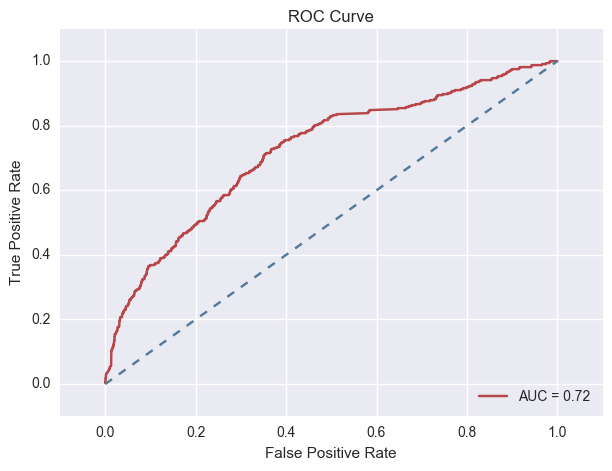

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate,
         label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')